## EDA Titanic

### Historia

[RODI-72](https://mercadolibre.atlassian.net/browse/RODI-72)

### Por:
Diego Alvarez

### Fecha:
2022-08-17

### Descripción:

EDA del dataset del Titanic


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = 50
sns.set_style("whitegrid")

In [5]:
train = pd.read_csv('.raw_data/train.csv') #crear .raw_data/ en local y almacenar ahí los datos
test = pd.read_csv('.raw_data/test.csv')
print(train.shape)
print(test.shape)
display(train.sample(5))
test.sample(5)

(891, 12)
(418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
441,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5000,NaN,S
613,614,0,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,NaN,Q
676,677,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.0500,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
285,1177,3,"Dennis, Mr. William",male,36.0,0,0,A/5 21175,7.2500,NaN,S
41,933,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S
172,1064,3,"Dyker, Mr. Adolf Fredrik",male,23.0,1,0,347072,13.9000,NaN,S
35,927,3,"Katavelas, Mr. Vassilios (Catavelas Vassilios"")""",male,18.5,0,0,2682,7.2292,NaN,C
344,1236,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S


In [3]:
#train.isnull().sum()
display(train.info())
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


At first sight the Cabin variable could be drop cause the high number of nulls, and also the Fare variable should hold the information related to the cabin (The higher the price the better the cabin). The age has to be analyzed and check if it could be imputed. For Embarked also we have to make an analysis but in a first try those null rows could be dropped.

In [4]:
display(train.describe())
train.describe(exclude=np.number)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Just 38% of passengers survived the accident.
The majority of passengers were from class 3.
The average age is 30 yo, with approx 5-month-old baby and 80 yo person as min and max.
The majority of passengers traveled without family
Average fare was 32 USD, with strange value of 0 USD (could be ship crew) Relation with Pclass
Tha majority of passengers where Male.
Age, SibSp, Parch and Fare have outliers
All names are unique
Majority of passengers arrived at the initial point (Southampton) Could use to input missings
Ticket is not unique, strange, but could be one ticket by purchased
Cabin also not unique, but makes sense

## Sex

In [40]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
train[['Sex','Survived']].groupby(['Sex']).mean()


,Survived
Sex,
female,0.742038
male,0.188908


Females are more likely to survive, this could be a first filter/rule to build a heuristic

## PClass

In [12]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [6]:
train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


First class passengers (rich ones) are more likely to survive, combined with Sex variable could be a stronger filter.

## Age

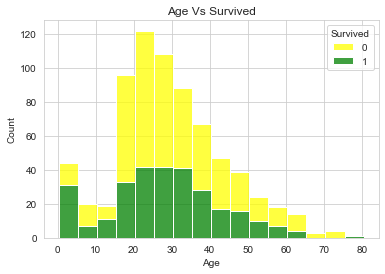

In [8]:
plt.figure(figsize = (6,4))
sns.histplot(data = train , x = 'Age' , hue = "Survived",binwidth=5,palette = sns.color_palette(["yellow" , "green"]) ,multiple = "stack" ).set_title(f"{'Age'} Vs Survived")

plt.show()

While most passengers are between 15 and 40 yo, the ones below 15 are more likely to survive, this could be because the well known "child and women first", so this feature could be very important with the 2 previous ones.

# Family (SibSp - Parch)
Since this two variables refer to the family of the passengers they could be joined as a unique variable

In [9]:
display(train[['SibSp','Survived']].groupby(['SibSp']).mean())
train[['Parch','Survived']].groupby(['Parch']).mean()


,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


Separately they don't show a clear relationship with the target variable, but could be used to generate new valuable features

## Embarked

In [13]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
train[['Embarked','Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


There's some kind of relationship but gotta check further by combining with other relevant features

## Fare

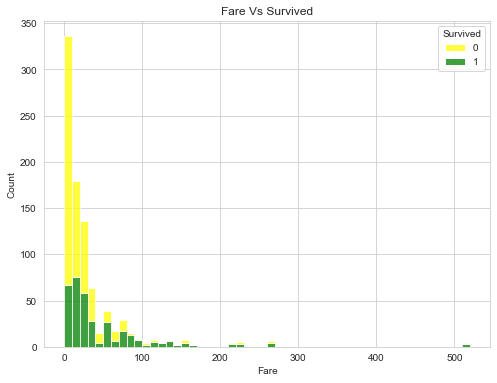

In [19]:
plt.figure(figsize = (8,6))
sns.histplot(data = train , x = 'Fare' , hue = "Survived",binwidth=10,palette = sns.color_palette(["yellow" , "green"]) ,multiple = "stack" ).set_title("Fare Vs Survived")

plt.show()


The higher the price of the ticket the probability to survive, this, as said before, could be related to the class of the ticket

## Multivariate Analysis

In [23]:
train[['Sex','Pclass','Survived']].groupby(['Sex','Pclass']).mean()


Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

<AxesSubplot:>

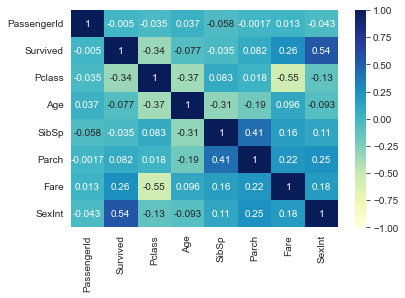

In [28]:
train['SexInt'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
sns.heatmap(train.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu', vmin=-1, vmax=1)

In [41]:
train['SurvivedPred'] = 0
train.loc[(train['Sex']=='female') & (train['Pclass']<3), 'SurvivedPred'] = 1
train.loc[(train['Age']<=5), 'SurvivedPred'] = 1
train.loc[(train['Age']>=10) & (train['Age']<=15), 'SurvivedPred'] = 1
train[['Survived','SurvivedPred']].describe()


,Survived,SurvivedPred
count,891.000000,891.000000
mean,0.383838,0.252525
std,0.486592,0.434705
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(train['Survived'],train['SurvivedPred'])


0.7991021324354658